In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('vadu-dummy-data.csv',header=1)
df.head()
unique=np.array([df['Class'].unique()])
print(unique)#found out there are three classes
df=df.drop(columns='SampleID')


[['Vata' 'Kapha' 'Pitta']]


In [3]:
df=df.replace('NA',np.nan)#replaced with actual nan values 
#had to do this else the labelencoder would encode NA as a value as well

In [4]:
# labelencoding on all since i am using random forest model
labels=LabelEncoder()
for i in df.columns:
    df[i]=labels.fit_transform(df[i])
print(df)

     Class  GENDER  F1  F2  F3  F4  ...  F127  F128  F129  F130  F131  F132
0        2       1   1   2   0   0  ...     1     1     1     1     1     0
1        0       1   2   0   0   1  ...     1     1     0     1     0     0
2        2       1   1   2   0   3  ...     0     1     1     0     1     1
3        2       1   1   2   0   2  ...     0     1     1     1     0     1
4        0       1   2   0   0   0  ...     1     1     0     0     0     0
..     ...     ...  ..  ..  ..  ..  ...   ...   ...   ...   ...   ...   ...
126      2       0   1   2   1   3  ...     1     1     1     1     0     1
127      2       0   1   2   1   3  ...     0     0     0     0     0     0
128      2       0   1   2   2   1  ...     1     1     0     0     0     0
129      2       0   1   1   1   3  ...     1     0     1     0     0     1
130      1       0   0   1   2   3  ...     1     0     1     1     0     0

[131 rows x 134 columns]


In [5]:
#replace na values in each row with its mode
for i in df.columns:
    df[i]=df[i].fillna(df[i].mode()[0])

In [6]:
#train test split
X=df.drop(columns='Class')
y=df['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
import time
model_normal=RandomForestClassifier(n_estimators=100,random_state=42)

#added to check time taken to train the model
starttime=time.time()
model_normal.fit(X_train,y_train)
endtime=time.time()

pred=model_normal.predict(X_test)
print(unique)
print(pred)
print('for normal model')
print(endtime-starttime)

[['Vata' 'Kapha' 'Pitta']]
[2 1 1 0 2 2 0 2 2 1 2 2 1 0 2 0 0 2 1 0 0 1 2 0 2 2 2]
for normal model
0.22903037071228027


In [8]:
from sklearn.metrics import r2_score,precision_score,recall_score,f1_score,confusion_matrix
acc=accuracy_score(y_test,pred)
r21=r2_score(y_test,pred)
p1=precision_score(y_test,pred,average='micro')
print(acc)
print(r21)
print(p1)


0.9259259259259259
0.8836206896551724
0.9259259259259259


In [9]:
y_pred=model_normal.predict(X_test)
print(y_pred)

[2 1 1 0 2 2 0 2 2 1 2 2 1 0 2 0 0 2 1 0 0 1 2 0 2 2 2]


In [10]:
#creating a model which uses parallel execution using all the CPU cores
model_para=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=2)
#-1 to use all cores of the cpu

#to check the time taken
start=time.time()
model_para.fit(X_train,y_train)
end=time.time()

para_pred=model_para.predict(X_test)
print(unique)
print(para_pred)
print("for parallel model")
print(end-start)

[['Vata' 'Kapha' 'Pitta']]
[2 1 1 0 2 2 0 2 2 1 2 2 1 0 2 0 0 2 1 0 0 1 2 0 2 2 2]
for parallel model
0.31563758850097656


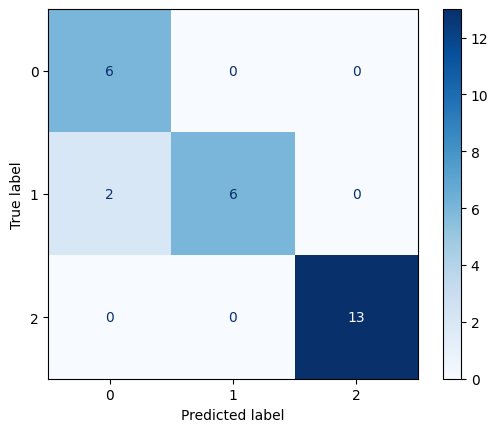

In [11]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm1=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot(cmap='Blues',values_format='d')

 

In [12]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)
print(y_pred1)
acc2=accuracy_score(y_test,y_pred1)
r22=r2_score(y_test,y_pred1)
p2=precision_score(y_test,y_pred1,average='micro')
print(acc2)
print(r22)


[2 1 1 0 2 2 0 2 2 1 2 2 1 0 2 1 0 2 1 0 0 0 2 0 2 2 2]
0.9259259259259259
0.8836206896551724


In [13]:
#Support vector machine
from sklearn.svm import SVC
model2=SVC(kernel='rbf',C=1,gamma='auto')
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
acc3=accuracy_score(y_test,y_pred2)
r23=r2_score(y_test,y_pred2)
p3=precision_score(y_test,y_pred2,average='micro')
print(acc3)
print(r23)
print(p3)


0.8888888888888888
0.8254310344827587
0.8888888888888888


In [14]:
#kNN
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier(n_neighbors=12)
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)
acc4=accuracy_score(y_test,y_pred3)
r24=r2_score(y_test,y_pred3)
print(acc4)
print(r24)

0.8888888888888888
0.8254310344827587


In [15]:
#multilayered perceptron
from sklearn.neural_network import MLPClassifier

model4=MLPClassifier(hidden_layer_sizes=(100,50),max_iter=500,random_state=42)
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)
acc5=accuracy_score(y_test,y_pred4)
print(acc5)
r25=r2_score(y_test,y_pred4)
print(r25)
p4=precision_score(y_test,y_pred4,average='micro')
print(p4)


0.8888888888888888
0.8254310344827587
0.8888888888888888


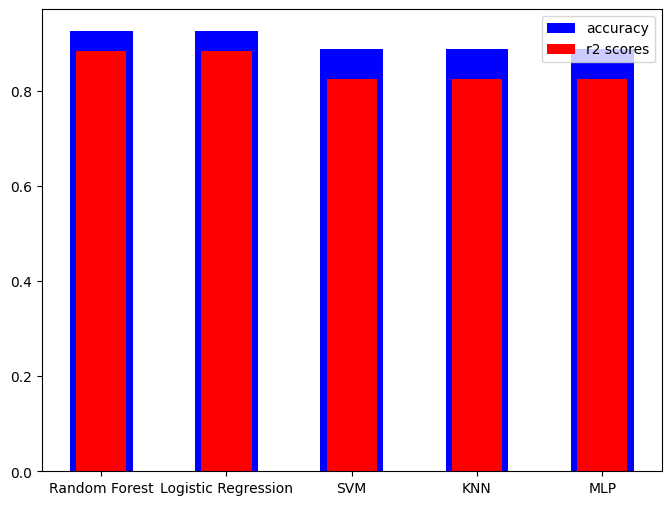

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
accuracies = [acc,acc2,acc3,acc4,acc5]
models = ["Random Forest", "Logistic Regression", "SVM", "KNN", "MLP"]
r2scores=[r21,r22,r23,r24,r25]
plt.bar(models,accuracies,color='blue',label='accuracy',width=0.5)
plt.bar(models,r2scores,color='red',label='r2 scores',width=0.4)
plt.legend(loc='best')

In [17]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, r2_score

# Sample model predictions (replace with your real ones)
# y_test = actual labels
# pred_rf, pred_lr, pred_svm, pred_mlp, pred_rnn = predictions from each model

# Compute metrics for each model
metrics_data = {
    'Model': ['Random Forest', 'Logistic Regression', 'SVM', 'KNN', 'MLP'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred1),
        accuracy_score(y_test, y_pred2),
        accuracy_score(y_test, y_pred3),
        accuracy_score(y_test, y_pred4)
    ],
    'Precision (Macro)': [
        precision_score(y_test, y_pred, average='macro'),
        precision_score(y_test, y_pred1, average='macro'),
        precision_score(y_test, y_pred2, average='macro'),
        precision_score(y_test, y_pred3, average='macro'),
        precision_score(y_test, y_pred4, average='macro')
    ],
    'R² Score': [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred1),
        r2_score(y_test, y_pred2),
        r2_score(y_test, y_pred3),
        r2_score(y_test, y_pred4)
    ]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the table
display(metrics_df.round(3))


,Model,Accuracy,Precision (Macro),R² Score
0,Random Forest,0.926,0.917,0.884
1,Logistic Regression,0.926,0.917,0.884
2,SVM,0.889,0.893,0.825
3,KNN,0.889,0.869,0.825
4,MLP,0.889,0.908,0.825


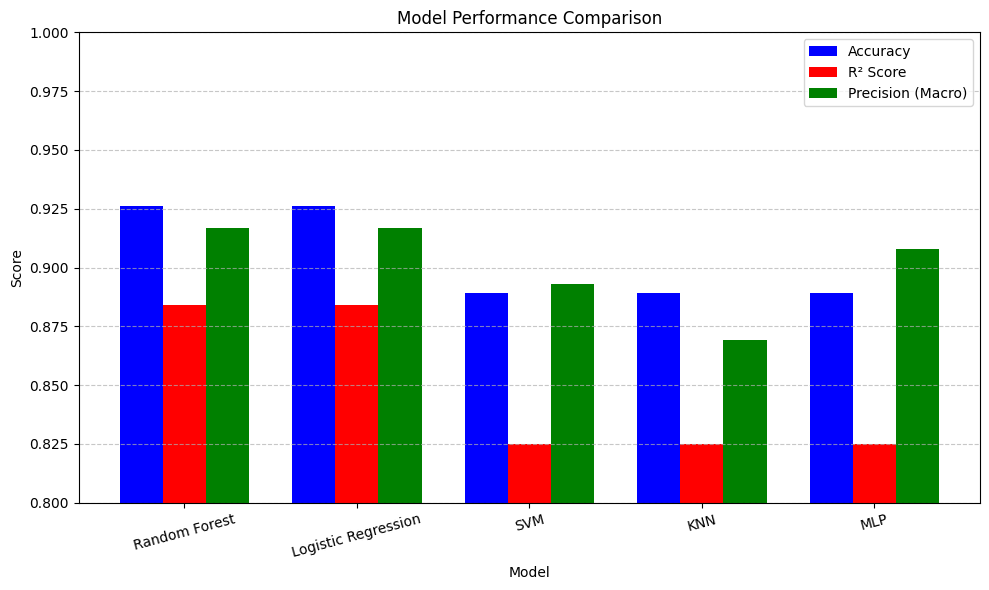

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your table
models = ['Random Forest', 'Logistic Regression', 'SVM', 'KNN', 'MLP']
accuracy = [0.926, 0.926, 0.889, 0.889, 0.889]
r2_scores = [0.884, 0.884, 0.825, 0.825, 0.825]
precision = [0.917, 0.917, 0.893, 0.869, 0.908]

x = np.arange(len(models))  # the label locations
width = 0.25  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, accuracy, width, label='Accuracy', color='blue')
bar2 = ax.bar(x, r2_scores, width, label='R² Score', color='red')
bar3 = ax.bar(x + width, precision, width, label='Precision (Macro)', color='green')

# Labels and formatting
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.set_ylim(0.8, 1.0)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
#applying PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
pca=PCA(n_components=0.94)
X_pca=pca.fit_transform(X_scaled)
print(pca.n_components_)
#components are reduced now we train a new model

68


In [29]:
model_pca=RandomForestClassifier(n_estimators=100,random_state=42)
Xpcatrain,Xpcatest,ytrain,ytest=train_test_split(X_pca,y,test_size=0.2,random_state=42)
model_pca.fit(Xpcatrain,ytrain)
pcapred=model_pca.predict(Xpcatest)
accpca=accuracy_score(pcapred,ytest)
print("accuracy after PCA to reduce components:",accpca)

accuracy after PCA to reduce components: 0.8888888888888888
